In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [2]:
dataframe_path = '/kaggle/input/diamonds/diamonds.csv'
df = pd.read_csv(dataframe_path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut', ylabel='price'>

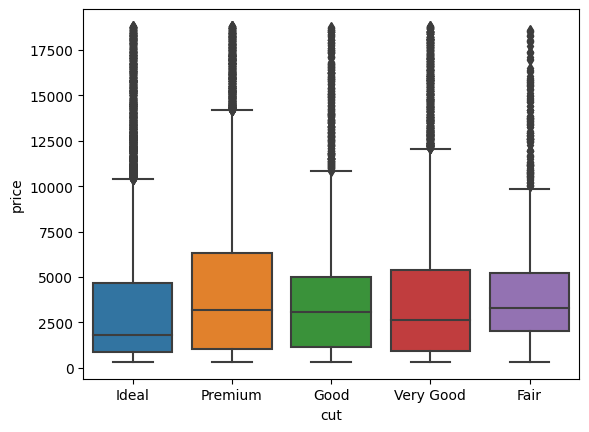

In [12]:
sns.boxplot(data = df, x = 'cut' , y = 'price')

<Axes: xlabel='color', ylabel='price'>

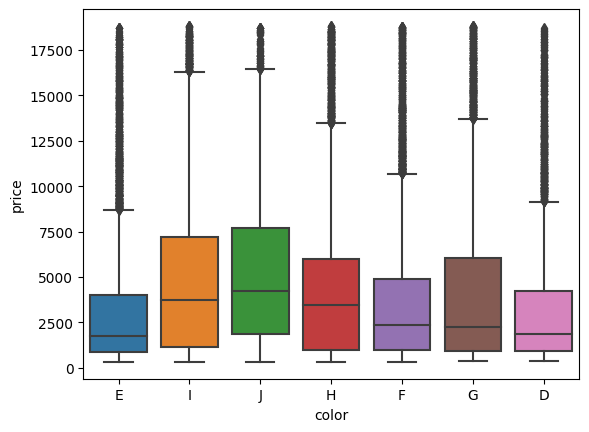

In [13]:
sns.boxplot(data = df, x = 'color' , y = 'price')

<Axes: xlabel='clarity', ylabel='price'>

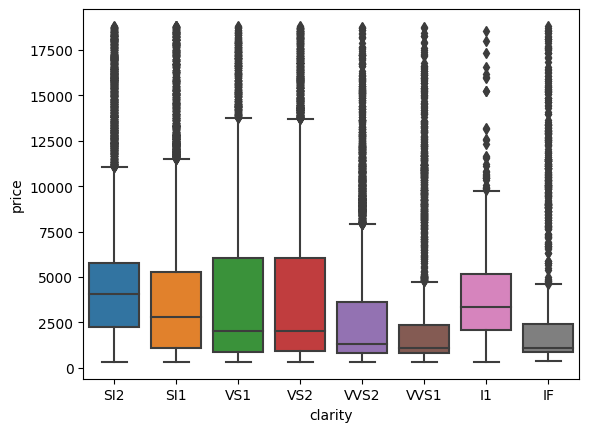

In [14]:
sns.boxplot(data = df, x = 'clarity' , y = 'price')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
df_numeric = df.drop(columns = ['cut','color','clarity'])

Text(0.5, 1.0, 'Correlation Heatmap')

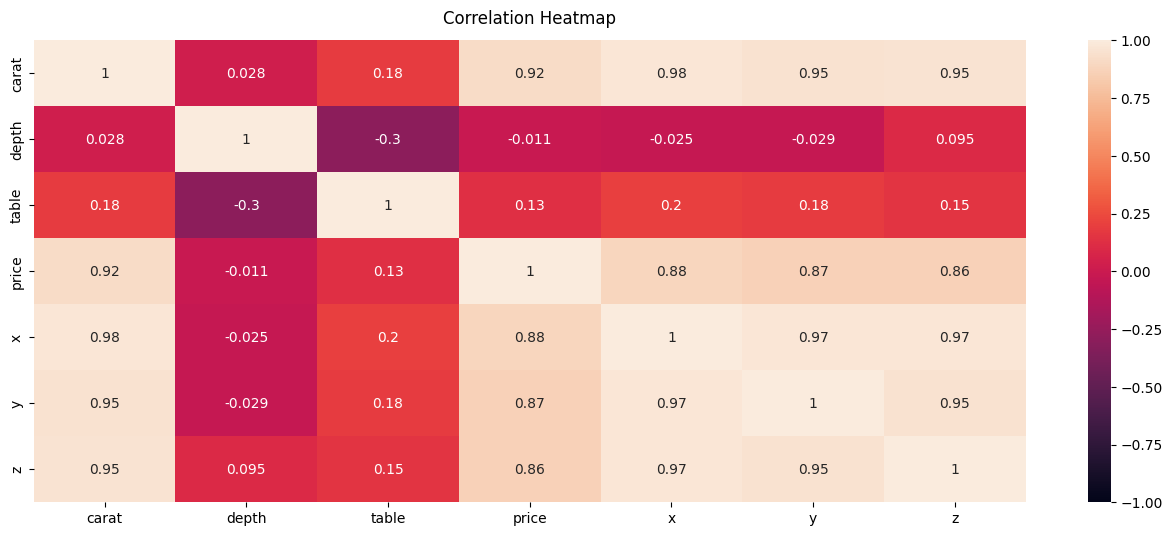

In [22]:
plt.figure(figsize=(16, 6))# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [23]:
df_numeric['volume'] = df_numeric['x'] * df_numeric['y'] *df_numeric['z']
df_numeric.head()

,carat,depth,table,price,x,y,z,volume
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250


Text(0.5, 1.0, 'Correlation Heatmap')

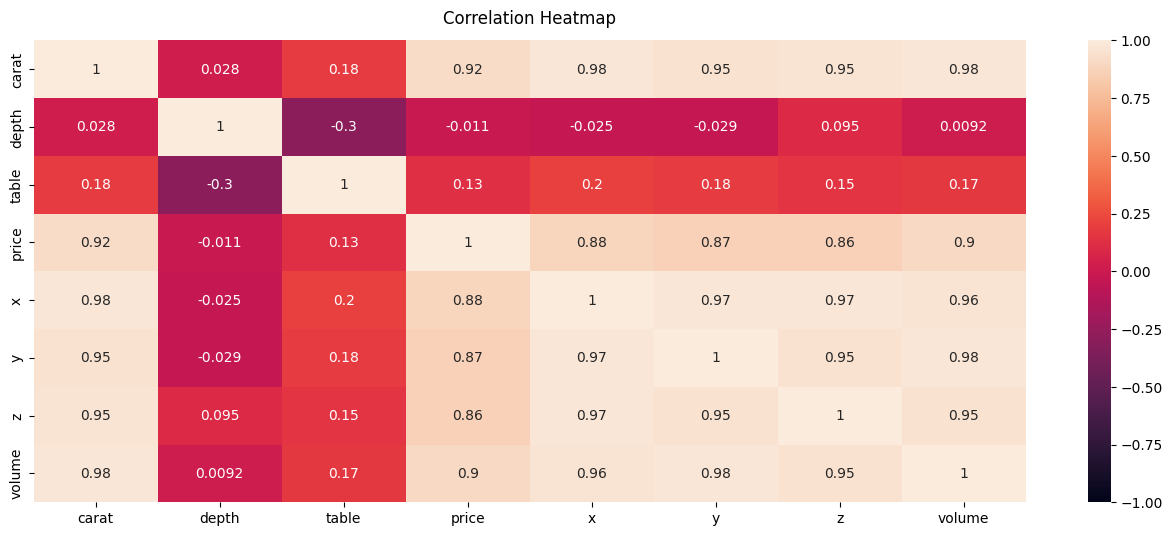

In [24]:
plt.figure(figsize=(16, 6))# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [25]:
df['volume'] = df['x'] * df['y'] * df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [27]:
df_one_hot = pd.get_dummies(df,columns = ['color','cut', 'clarity'])
df_one_hot

,carat,depth,table,price,x,y,z,volume,color_D,color_E,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,False,True,...,True,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,115.920000,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,118.110175,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,114.449728,True,False,...,False,True,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,140.766120,False,False,...,True,False,False,False,False,True,False,False,False,False


In [28]:
df_final = df_one_hot.drop(columns = ['x','y','z','depth'])
df_final.head()

,carat,table,price,volume,color_D,color_E,color_F,color_G,color_H,color_I,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,38.202030,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,61.0,326,34.505856,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0.23,65.0,327,38.076885,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,58.0,334,46.724580,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,58.0,335,51.917250,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [29]:
X = df_final.drop(columns = 'price')
y = df_final['price']
(X.shape,y.shape)

((53940, 23), (53940,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scales numerical features
    ('regressor', LinearRegression())  # Linear regression model
])

# Step 2: Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Evaluate the model using cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='r2')  # 'r2' for regression
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2 Score:", scores.mean())

Cross-Validation R^2 Scores: [0.9189026  0.91698419 0.90963623 0.91676522 0.91558256]
Mean R^2 Score: 0.9155741611454754


In [41]:

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

In [42]:
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [44]:
cv_results_rms = []
from sklearn.model_selection import RandomizedSearchCV, KFold
for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10, random_state=42,shuffle = True)
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=kfold)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1158.909028 
Lasso: 1158.508322 
DecisionTree: 740.641740 
RandomForest: 564.272270 
KNeighbors: 850.934609 
XGBRegressor: 570.627341 


In [46]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9796966127507872
Adjusted R^2: 0.9796532294446991


In [47]:
X_test

,carat,table,volume,color_D,color_E,color_F,color_G,color_H,color_I,color_J,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,0.24,56.0,39.223600,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
50052,0.58,57.0,96.120448,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
41645,0.40,55.0,66.559080,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42377,0.43,57.0,71.695224,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
17244,1.55,55.0,252.779208,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44081,0.50,59.0,81.666376,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
23713,0.25,57.0,41.208750,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
31375,0.31,62.0,50.974092,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21772,1.23,54.0,199.481590,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [48]:
import joblib

joblib.dump(pipeline_xgb, "model.pkl") 


['model.pkl']

In [49]:
clf2 = joblib.load("model.pkl")

clf2.predict(X_test[0:1])

array([579.5984], dtype=float32)